# Group 2: Maija Välimäki, Dante Mwatibo and Leonardo Rodovero
*Assignment 1*

*28.2.2025*

# Part 1
**Explore temporal patterns in SF crime data, with a focus on 10 key crime categories.**

In this part, we first calculate overall crime trends—identifying the years with the highest and lowest crime counts and plotting the total crimes per year. Then, we drill down into the evolution of the so-called focus crimes (i.e., WEAPON LAWS, PROSTITUTION, ROBBERY, BURGLARY, ASSAULT, DRUG/NARCOTIC, LARCENY/THEFT, VANDALISM, VEHICLE THEFT, STOLEN PROPERTY) by creating individual bar charts for each crime type, showing how their occurrence changes year by year.

In [1]:
#importing all required extensions
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import folium
from folium.plugins import HeatMap
import calplot
from folium.plugins import HeatMapWithTime
import json
import urllib.request
import matplotlib as mpl
import calendar
from folium import plugins
print('All imported!')

All imported!


In [2]:
# Importing data: merged dataset from 2003–2025 
df = pd.read_csv('merged_data.csv')
df.columns

Index(['Category', 'PdDistrict', 'X', 'Y', 'Date', 'Time', 'TimeOfDay',
       'DayOfWeek', 'DayOfMonth', 'Month', 'Year'],
      dtype='object')

In [3]:
df['Year'].sort_values().unique()  # Check the years in the dataset

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
       2025])

In [4]:
# Count the crimes per year and identify extremes.
year_counts = df['Year'].value_counts().sort_index()

most_crimes_year = year_counts.idxmax()    # Year with maximum crime count
fewest_crimes_year = year_counts.idxmin()    # Year with minimum crime count

print("Year with the most crimes:", most_crimes_year)
print("Year with the fewest crimes:", fewest_crimes_year)

Year with the most crimes: 2015
Year with the fewest crimes: 2025


In [5]:
# Knowing that 2025 is not a full year, let's also find the year full year with the fewest crimes
full_year_counts = df[df['Year'] != 2025]['Year'].value_counts().sort_index()

fewest_crimes_full_year = full_year_counts.idxmin()    # Year with minimum crime count

print("Full year with the fewest crimes:", fewest_crimes_full_year)

Full year with the fewest crimes: 2024


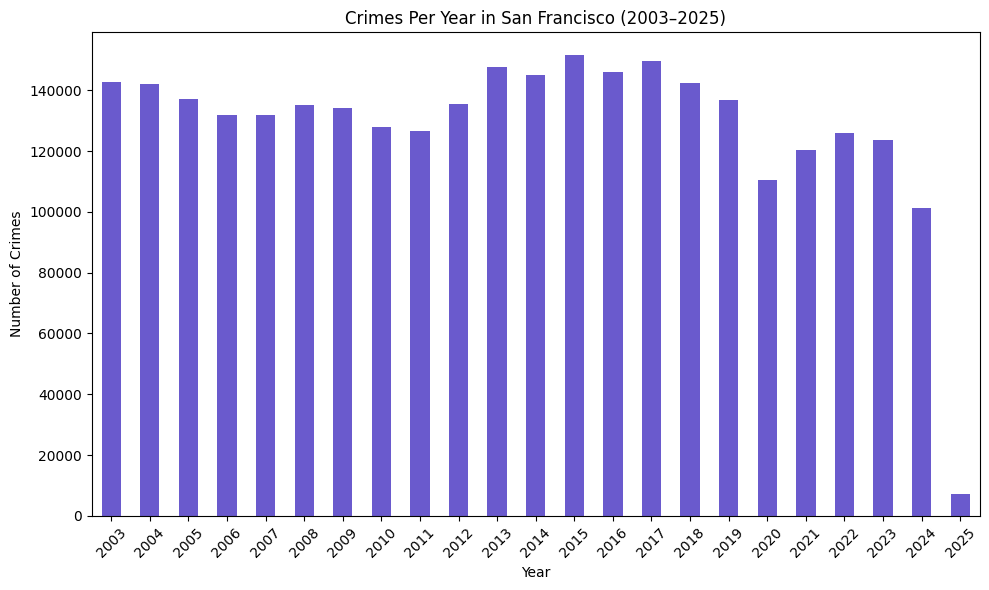

In [6]:
# --- Overall Bar Plot for Crimes Per Year ---
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar', color='slateblue')
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.title("Crimes Per Year in San Francisco (2003–2025)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

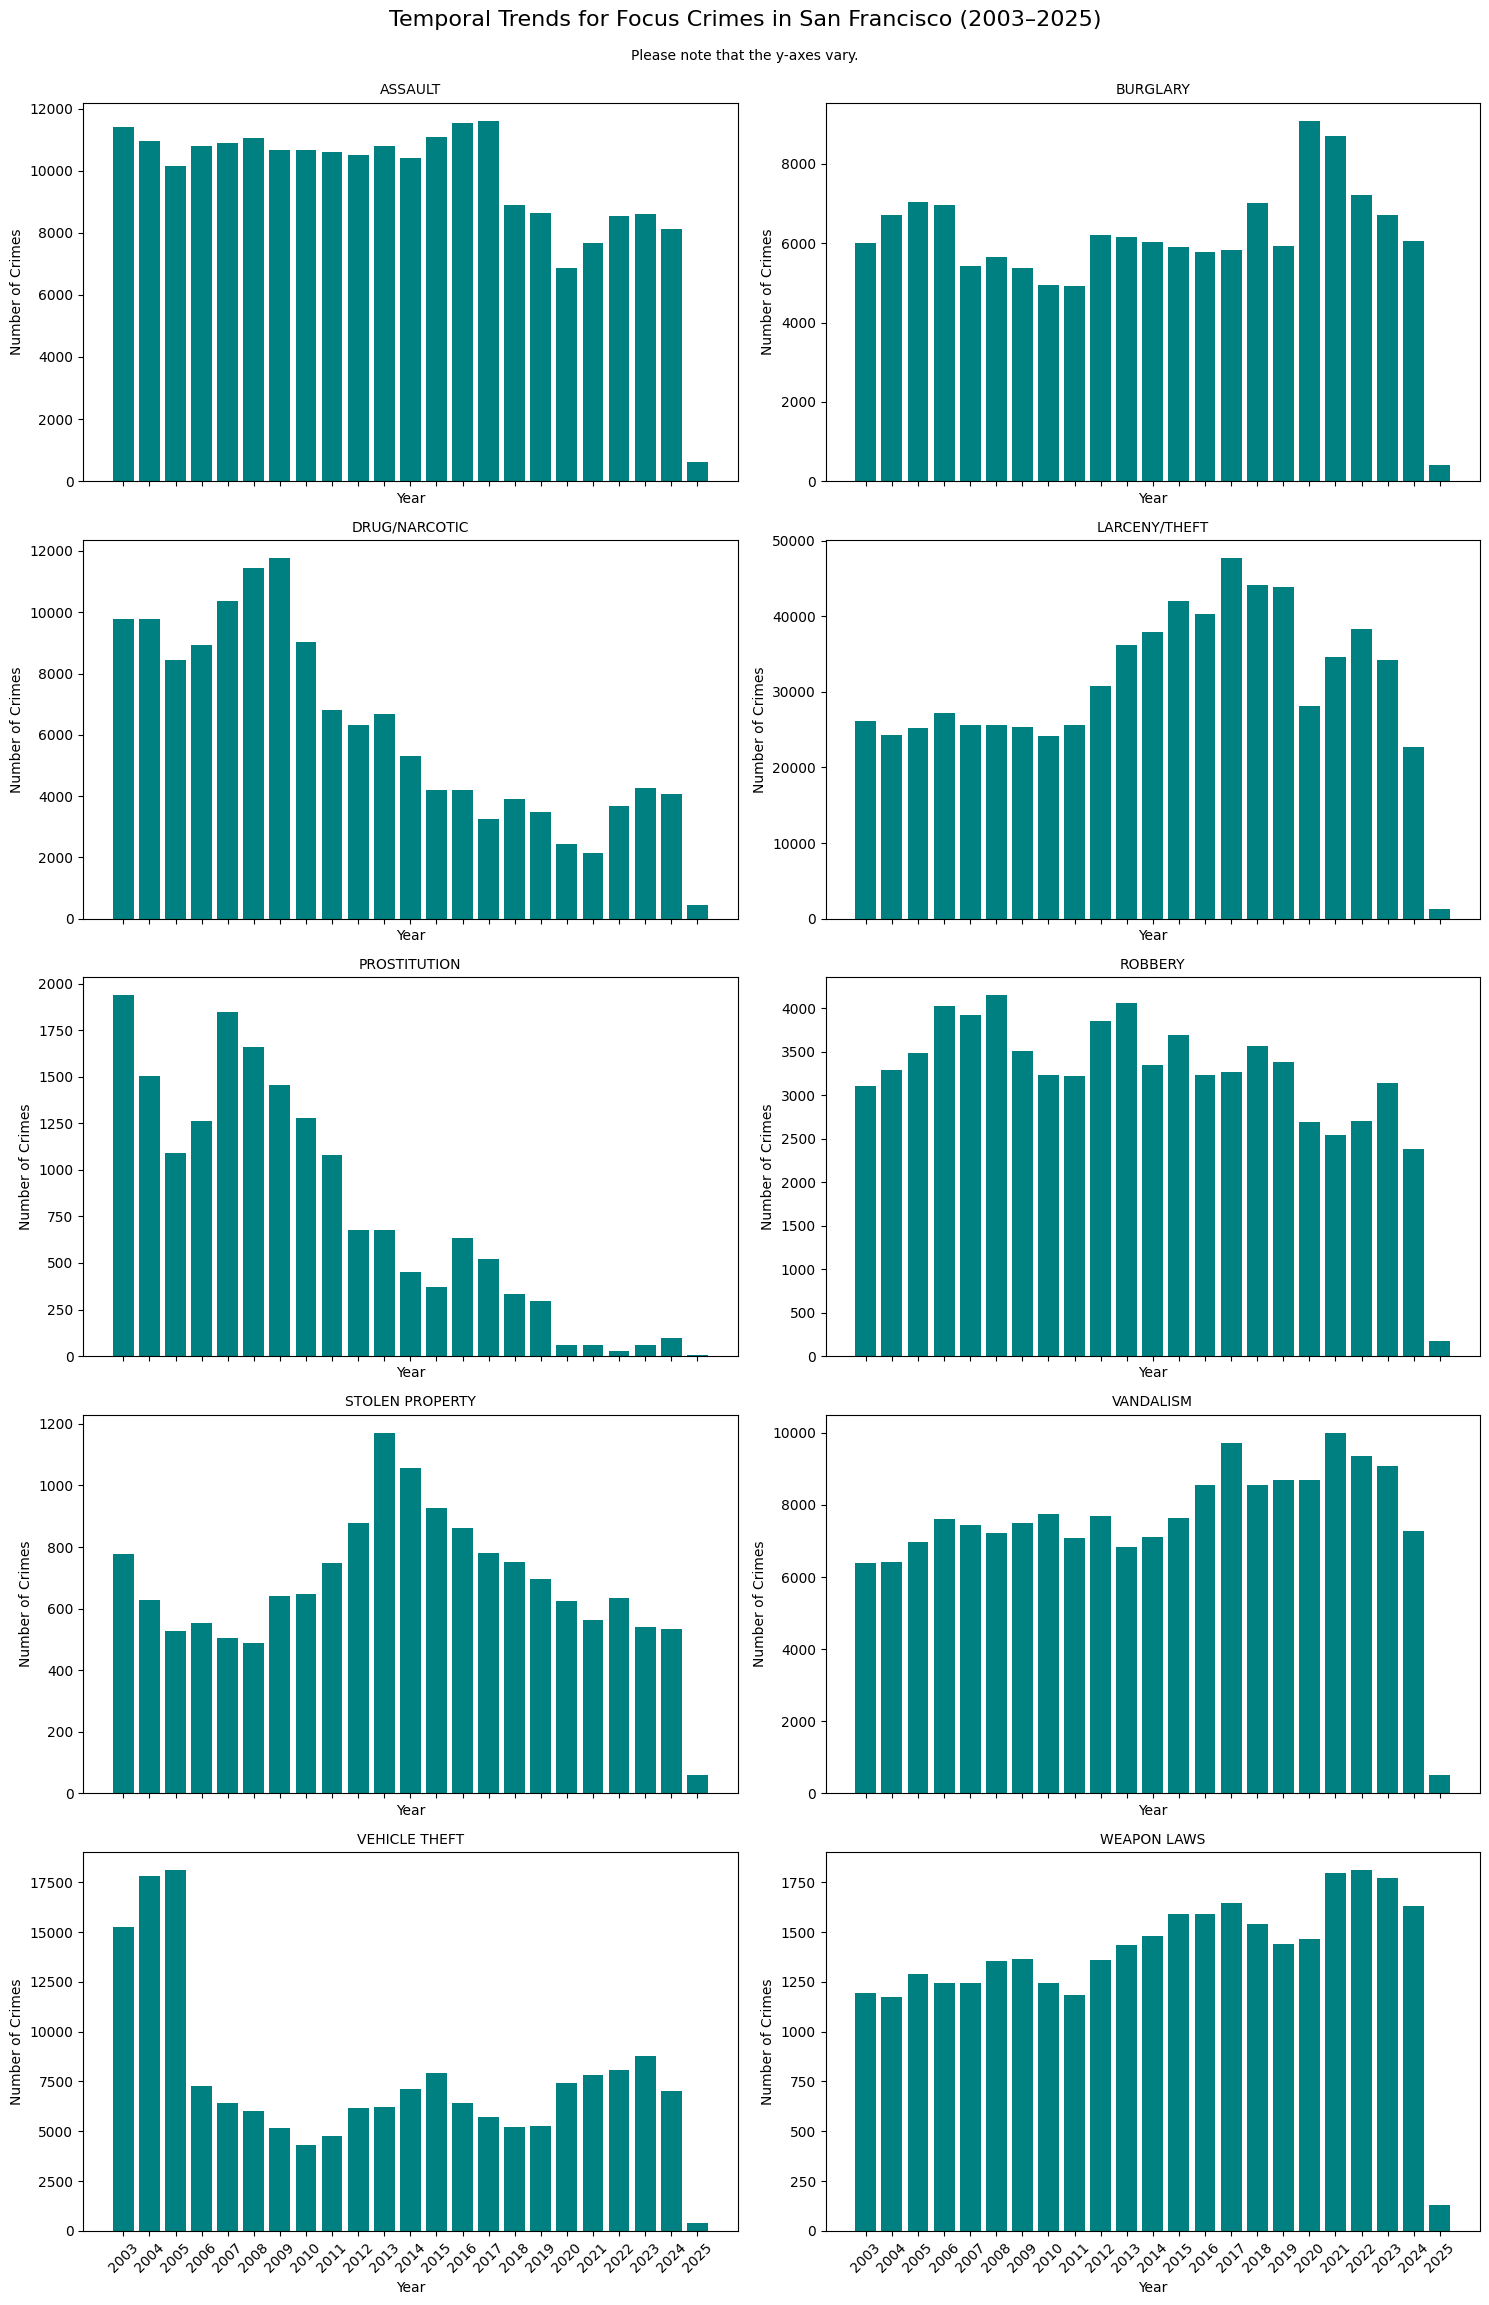

In [7]:
# --- Focus Crimes Analysis ---
focuscrimes = set([
    'WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT',
    'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'
])

# Create a subplot grid: 5 rows x 2 columns for the 10 focus crimes.
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25), sharex = True)
axes = axes.flatten()
xticks = [0, 1, 8, 9] #defining the plots for which we want to show the xlabels

sorted_focus = sorted(focuscrimes) #sorting to aplhabetical order


for i, crime in enumerate(sorted_focus):
    # Filter dataset for the current focus crime.
    crime_df = df[df['Category'] == crime]
    # Count crimes per year for this category.
    crime_year_counts = crime_df['Year'].value_counts().sort_index()
    
    # Plotting the year-by-year development for this focus crime.
    axes[i].bar(crime_year_counts.index.astype(str), crime_year_counts.values, color='teal')
    axes[i].set_title(f"{crime}", fontsize=10)
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Number of Crimes")
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle("Temporal Trends for Focus Crimes in San Francisco (2003–2025)\n", fontsize=16, y=0.95)
fig.text(0.5, 0.93, "Please note that the y-axes vary.", horizontalalignment="center")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Crime Trends Analysis

This notebook analyzes three key trends observed in crime data over 2003-2025. The trends highlight how technological advances, policy changes, and societal shifts can influence criminal behavior.

---

### 1. Significant Decline in Vehicle Theft

- **Observation:** A steep decline in vehicle theft starting from 2005.
- **Explanation:** This decline aligns with the introduction of engine immobilizer systems. These systems make vehicles more difficult to steal by requiring the proper key. As older cars without this technology are phased out, the number of easy targets for thieves diminishes.
- **Impact:** Demonstrates how advances in automotive technology can reduce crime rates.

---

### 2. Changing Landscape of Drug/Narcotic Offenses

- **Observation:** A noticeable drop in drug/narcotic offenses, particularly beginning in the early 2010s.
- **Explanation:** This trend may result from several factors:
  - Shifts in law enforcement priorities.
  - Policy changes, such as reduced sentencing for certain drug offenses.
  - Broader societal changes in patterns of drug use.
  - Difference in how such crimes are recorded aka the used category
- **Impact:** Reflects how evolving legislation, policing strategies, and public attitudes can reshape crime statistics.

---

### 3. Fluctuations in Property-Related Crimes

- **Observation:** Categories like burglary, larceny/theft, and stolen property exhibit distinct patterns. The big economical depression in 2008 could be a reason behind this.
- **Details:**
  - **Burglary:** Generally shows a gradual decline, potentially due to improved home security measures and targeted policing.
  - **Larceny/Theft:** Its trend increases over time.
  - **Stolen Property:** From 2013 there has been a significant drop.
- **Impact:** Highlights that property crimes are influenced by economic conditions, policing strategies, and shifts in consumer habits (for example, the impact of online shopping versus in-store theft).

---

# Part 2 
This section of the assignment answers to the written questions from week 2.

**1. Answer questions related to the main video-lecture on Data Visualization. (Where the first question is "What is the difference between *data* and *metadata*?")**

1. What is the difference between data and metadata? How does that relate to the GPS tracks-example?

&emsp; &emsp; &emsp; The difference between data and metadata is that one is derived from the other. Namely, data is derived from metadata. Data is information gathered from observations or manipulation of observations in the world. However, metadata is information about data. For example, in the GPS tracks-example we see there is data on heart rate over time. That would be data as that is an observation of someone's heart rate. Metadata for this might be what sensor/method was used to read the heart rate of the indivudal. This would be information about how the data was gathered. Metadata might also include the demographics of the individual.

2. Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that is difficult for the human eye? Explain why your example is difficult.

&emsp; &emsp; &emsp; I agree as we have been able to learn a lot from observing with the human eye, and it (typcially) costs $0 meaning it has a low barrier for entry of use. However, like every tool the eye has its limitations and strengths. So long as whatever is being observed doesn't exploit the limitations of the human eye I believe it is an effective tool. For things too small, large, complex, or fast to see with the naked eye, such as the amount of bacteria grown in a certain area, it's best to rely on existing tools and inginuity to most accurately record observations. This is difficult to observe because the human eye cannot see the vast majority of bacteria, and the sheer number of bacteria that can fit in a small area is also difficult to track. Even if one were to somehow manage to count the number of bacteria for a particular instance, they multiply and die so fast that between the time someone were to start counting by the time they would finish counting the true number would have already changed by a potentially large amount. For things that are easy for the eyes to see and don't rely on guestimation. For example, the number of students that use a particular outdoor patio on a given day would be easy to track as one could sit outside and easily count and keep track of people on a notepad.

3. Simpson's paradox is hard to explain. Come up with your own example – or find one online. 

&emsp; &emsp; &emsp; As I understand Simpson's paradox, it's a parodox in which one trend is shown when looking at data as a whole, however once stratified, clustered, or otherwise grouped, a different trend, and thus a different conclusion, reveals itsself. One exmaple I can think of is with salary information. For example, if one were to look at demographic A and demographic B and see that demographic A tends to be have a higher base salary than demographic B, one might determine that demographic B is being discriminated against. However, if one were to then stratify this data by job sector they might find that demographic A tends to pick professions which have high base salaries at a rate significantly higher than demographic B, which tendns to pick professions which have low base salaries at a rate significantly higher than demographic B. And this can be true even if across the board for every profession group B were to make a higher base salary than group A.


4. In your own words, explain the difference between exploratory and explanatory data analysis. 

&emsp; &emsp; &emsp; Exploratory analysis will typically take place before explanatory data analysis. Exploratory analysis is for discovering trends, finding outliers, and finding correlations between different recorded findings, among other things. In exploratory analysis, one is typically working from raw data with no patowards creating graphs, tables, and other visualizations which can help to more easily identify trends, outliers, and correlations. Explanatory data analysis on the other hand, typically follows exploratory data analysis and is meant to make trends, outliers, and correlations more easily explainable to the average person. With explanatory analysis, we are trying to tell a larger story about the data that the average person can understand. 

**2. Answer questions related to the video on "Nice plots". That is, generate the list of 10 rules for nice plots.**

One principle to rule them all: Make the plots as readable as possible.

1. Utilize subplots whenever that is possible (especially if the plots are comperable)
2. Maximize the size of the plots, use the tight_layout function :)
3. Always use the labels: both for the axes and often the legend
4. Focus on having the axes have sensible ticks
5. Be intentional: check if the automatic plotting over-dramatizes stuff. (zoom-level) – you could end up accidentally sort of lying.
6. Subplots: make the plots comperable by making sure that the y-axes are shared or put a note that the axes differ
8. Think about what the axes mean.
9. prioritize informativity: show the data and delete useless stuff.
10. If you want to impress Sune, change the font.
11. Captions! Focus on those, be intentional.

# Part 3
This section covers two types of visualisations from week 2.

#### Part A: Calendar Heatmaps
to showcase daily variations. We use  *burglary crimes in 2022* as an example.

Calendar Plots: A calendar heatmap shows how burglary crimes are distributed throughout the days of the year, similar to GitHub’s contributions chart.

In [8]:
# Choose a subset of the data: focus on burglary crimes in 2022.

#ensuring that the date information is in datetime-format
df['Date'] = pd.to_datetime(df['Date'])

#choosing the crime and years of interest
crime_of_interest = 'BURGLARY'
year_of_interest = 2022

#filtering the data
df_subset = df[(df['Category'].str.upper() == crime_of_interest) & (df['Year'] == year_of_interest)]

(<Figure size 1250x170 with 2 Axes>,
 array([<Axes: ylabel='2022'>], dtype=object))

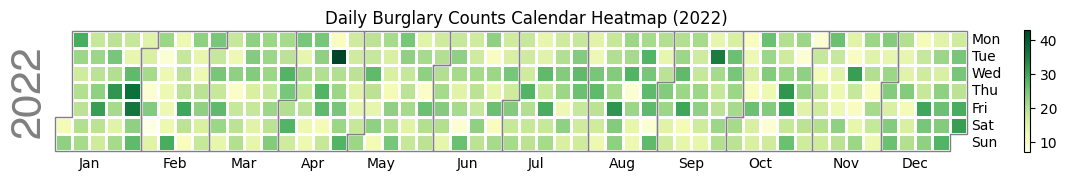

In [9]:
# =============================================================================
# 1. Calendar Plot: Daily Burglary Counts for all years
# =============================================================================
# Aggregate burglary counts by day

daily_counts = df_subset.set_index('Date').resample('D').size()

# Option 1: Calendar heatmap for all complete years (here, 2022 only)
calplot.calplot(daily_counts, cmap='YlGn', colorbar=True,
                suptitle='Daily Burglary Counts Calendar Heatmap (2022)')

Text(0.5, 0.62, 'Burglary Calendar Heatmap for 2022')

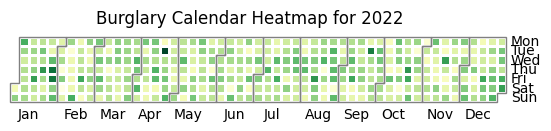

In [10]:
# Option 2: Alternatively,  a yearplot for 2022 only.
calplot.yearplot(daily_counts[daily_counts.index.year == year_of_interest], 
                 year=year_of_interest, cmap='YlGn')
plt.suptitle(f'Burglary Calendar Heatmap for {year_of_interest}', y=0.62)

#### Part B: Polar bar chart
to provide an overall trend and to highlight changes over time. In this case, we are showcasing the polar bar chart. We use  *robbery crimes through out the years* as an example.

Show how “ROBBERY” incidents are distributed across 24 hours of the day in a radial (polar) chart. A circular layout can be intuitive for time-of-day data because midnight “wraps around” and meets 11 PM.

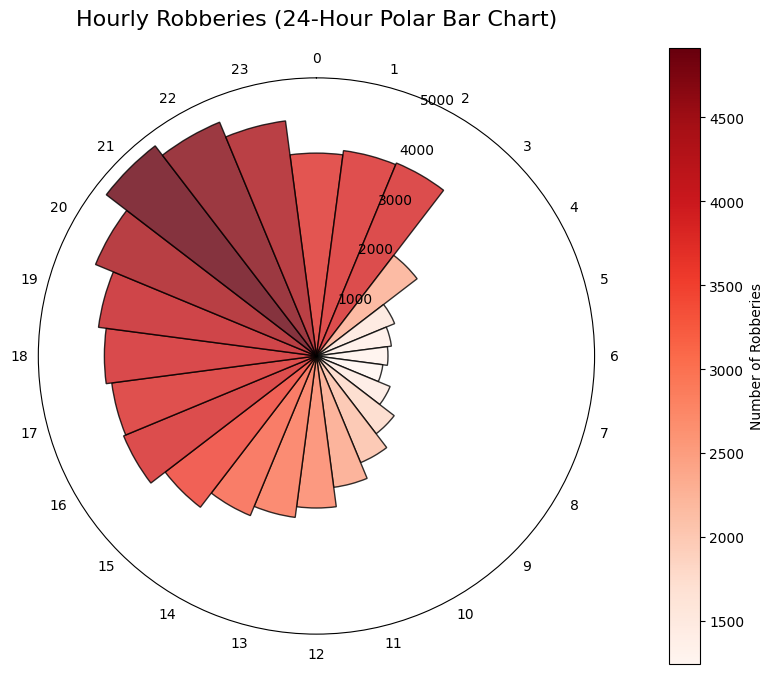

In [11]:

df_robbery = df[df['Category'] == 'ROBBERY'].copy()

# Convert Time column to datetime (assuming HH:MM format)
df_robbery['Time'] = pd.to_datetime(df_robbery['Time'], format='%H:%M', errors='coerce')

# Extract the hour
df_robbery['Hour'] = df_robbery['Time'].dt.hour

# Group by hour to get counts
hourly_counts = df_robbery.groupby('Hour').size()

# Ensure we have a value for each hour from 0..23 (fill missing with 0)
all_hours = np.arange(24)
hourly_counts = hourly_counts.reindex(all_hours, fill_value=0)

# Prepare polar coordinates
theta = 2 * np.pi * all_hours / 24.0  # even spacing of 24 hours around the circle
width = 2 * np.pi / 24.0

# Create a normalization and a colormap for the bar colors
norm = mpl.colors.Normalize(vmin=hourly_counts.min(), vmax=hourly_counts.max())
cmap = plt.cm.Reds  # choose any Matplotlib colormap you like
colors = cmap(norm(hourly_counts.values))

# Create the figure and polar subplot
fig = plt.figure(figsize=(8, 8))  # slightly larger for readability
ax = fig.add_subplot(111, polar=True)

# Plot the bars
bars = ax.bar(theta, hourly_counts, width=width, bottom=0,
              color=colors, edgecolor='black', alpha=0.8)

# Make the plot go clockwise, with 0 hours (midnight) at the top
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2.0)

# Set up hour labels around the circle
ax.set_xticks(theta)
ax.set_xticklabels(all_hours)

# Remove radial grid lines if you want a cleaner background
ax.grid(False)

# Add a colorbar to interpret the color scale
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # required dummy array for colorbar
cbar = fig.colorbar(sm, ax=ax, pad=0.1, shrink=0.8)  # adjust pad & shrink for layout
cbar.set_label('Number of Robberies')

# Add a title
plt.title("Hourly Robberies (24-Hour Polar Bar Chart)", y=1.08, fontsize=16)

# Use tight_layout to improve spacing
plt.tight_layout()
plt.show()

#### Analysis of Burglary Data in 2022
Some thoughts on the plots from A and B

##### Calendar Heatmap Observations

- **High Spike in April:**  
  A notable observation is that a Tuesday in April registered the highest daily count of burglaries (exceeding 40 incidents). This outlier stands out against most days that generally range between 10 and 30 incidents.

- **Irregular Patterns:**  
  Although there are sporadic spikes scattered throughout the year, no clear seasonal pattern emerges (e.g., summer isn’t consistently high and winter isn’t consistently low). Instead, clusters of higher activity appear to be tied to specific local events or other external factors.


##### Polar bar chart Observations

- This visualation works very nicely for understanding when specific crimes occur. The shape resembles clock in a way that makes it easy for a human brain process.
- From this graph, you can see that the robberies happen mostly during the evening, with the spike being inbetween 21–22. The least robberies happen during the morning hours.

# Part 4
This part includes exercises from the week 3.

### Exercise Part 1: Connecting the dots and recreating plots from DAOST but using our own favorite dataset

#### A) Figure 2.1 Style: Jitter Plot

We decided to analyse the category 'VEHICLE THEFT' during the period 2004-01-01 and 2004-06-30

In [12]:
#defying the masking criteria
crime_type = "VEHICLE THEFT"
start_date = "2004-01-01"
end_date   = "2004-06-30"

#filtering the data with the chosen masking
mask_crime = df["Category"] == crime_type
mask_dates = (df["Date"] >= start_date) & (df["Date"] <= end_date)
filtered_df = df[mask_crime & mask_dates].copy()

In [13]:
#editing the time of the crimes to decimal hours
def time_to_decimal_hours(time_str):
    """Convert 'HH:MM' -> float(HH + MM/60)."""
    try:
        hh, mm = time_str.split(":")
        return float(hh) + float(mm)/60
    except:
        return np.nan  # fallback for malformed times

filtered_df["DecimalHour"] = filtered_df["Time"].apply(time_to_decimal_hours)

# Keep records in the hour range 23:00–24:00
hour_mask = (filtered_df["DecimalHour"] >= 23.0) & (filtered_df["DecimalHour"] < 24.0)
subset_df = filtered_df[hour_mask].copy()
print(f"Number of {crime_type} records in [23.00-24:00]:", len(subset_df))

Number of VEHICLE THEFT records in [23.00-24:00]: 610


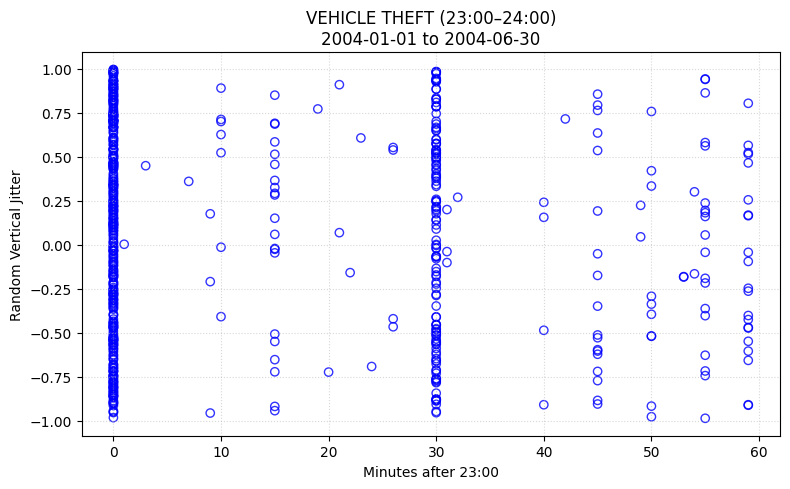

In [14]:
#plotting the 2.1 Jitter plot
jitter_strength = 1.0 
subset_df["jitter"] = np.random.uniform(-jitter_strength, jitter_strength, size=len(subset_df))

# Convert decimal hour to "minutes after 13:00" for the x-axis
subset_df["MinutesAfter23"] = (subset_df["DecimalHour"] - 23.0) * 60

plt.figure(figsize=(8, 5))
plt.scatter(
    subset_df["MinutesAfter23"],
    subset_df["jitter"],
    marker='o',
    facecolors='none',   # hollow circles
    edgecolors='blue',
    alpha=0.8
)

plt.title(f"{crime_type} (23:00–24:00)\n{start_date} to {end_date}")
plt.xlabel("Minutes after 23:00")
plt.ylabel("Random Vertical Jitter")
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


**Analysis: Jitter Plot for VEHICLE THEFT (23:00–24:00)**

*Clustering at Round Minutes*:

Notice large stacks of points at minute 0 and minute 30, suggesting that times are often recorded at half-hour intervals rather than precise seconds. This tells more about the SF police habits than about the actual crime patterns.

*Data Quality Insight*:

The coarse, “binned” nature of recorded times may hide finer temporal patterns (e.g., distinguishing between 23:07 and 23:10). This rounding could distort detailed time-based analysis.

#### B) Figure 2.2 Style: Histograms

We'll pick two different crime types with interesting geographical patterns, then pick a suitable time interval with 1,000–10,000 points each. We'll plot the distribution of latitudes in ~50 bins.

The chosen crimes are BURGLARY and VEHICLE THEFT.

In [15]:
crime1 = "BURGLARY"
crime2 = "VEHICLE THEFT"

start_date = "2010-01-01"
end_date   = "2011-12-31"
mask_dates = (df["Date"] >= start_date) & (df["Date"] <= end_date)

df_c1 = df[(df["Category"] == crime1) & mask_dates].copy()
df_c2 = df[(df["Category"] == crime2) & mask_dates].copy()

print(f"{crime1} rows:", len(df_c1))
print(f"{crime2} rows:", len(df_c2))

# Clean out lat outliers (e.g. 90.0 placeholders)
df_c1 = df_c1[(df_c1["Y"] > 37) & (df_c1["Y"] < 38)]
df_c2 = df_c2[(df_c2["Y"] > 37) & (df_c2["Y"] < 38)]
print(f"{crime1} valid-lat rows:", len(df_c1))
print(f"{crime2} valid-lat rows:", len(df_c2))



BURGLARY rows: 9869
VEHICLE THEFT rows: 9079
BURGLARY valid-lat rows: 9869
VEHICLE THEFT valid-lat rows: 9079


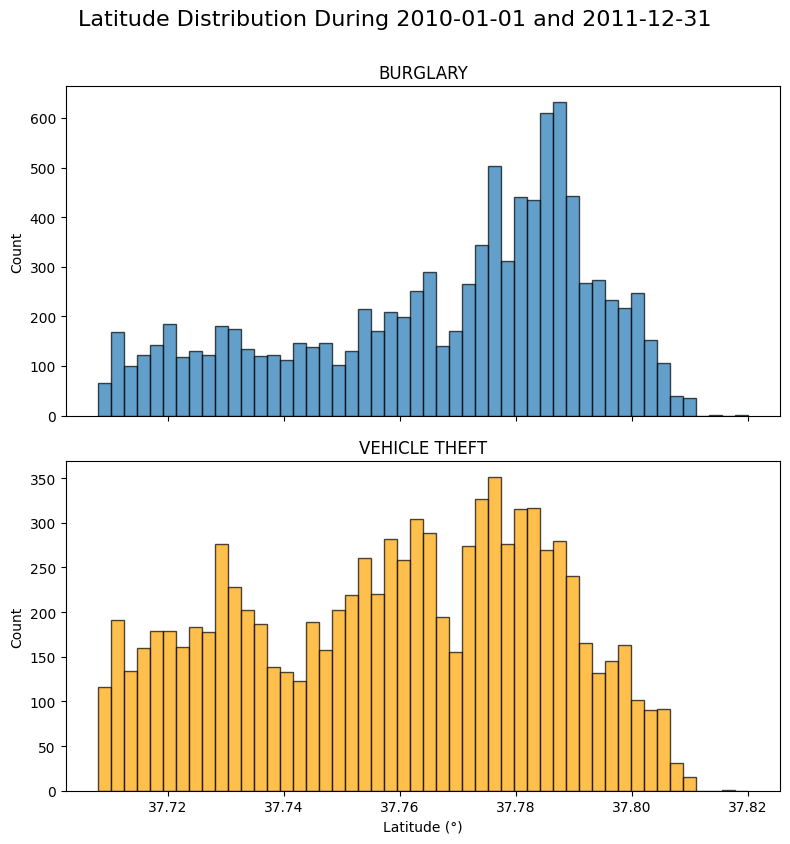

In [16]:
#moving on to plotting

lat_min = min(df_c1["Y"].min(), df_c2["Y"].min())
lat_max = max(df_c1["Y"].max(), df_c2["Y"].max())

num_bins = 50
bins = np.linspace(lat_min, lat_max, num_bins+1)

# histogram counts
hist_c1, bin_edges = np.histogram(df_c1["Y"], bins=bins)
hist_c2, bin_edges = np.histogram(df_c2["Y"], bins=bins)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), sharex=True)

bin_width = bin_edges[1] - bin_edges[0]
bin_centers = bin_edges[:-1] + bin_width/2

# Subplot 1
axes[0].bar(bin_centers, hist_c1, width=bin_width, edgecolor="k", alpha=0.7)
axes[0].set_title(f"{crime1} (Latitude Distribution) {start_date}/{end_date}")
axes[0].set_ylabel("Count")

# Subplot 2
axes[1].bar(bin_centers, hist_c2, width=bin_width, color="orange", edgecolor="k", alpha=0.7)
axes[1].set_title(f"{crime2} (Latitude Distribution) {start_date}/{end_date}")
axes[1].set_xlabel("Latitude (°)")
axes[1].set_ylabel("Count")

plt.tight_layout()
fig.suptitle(f"Latitude Distribution During {start_date} and {end_date}", fontsize=16, y=1.05)
axes[0].set_title(f"{crime1}", fontsize=12)
axes[1].set_title(f"{crime2}", fontsize=12)
plt.show()

#### C) Figure 2.4 Style: Histogram + KDE

Using the data from 1) 2.1 Jitter Plot, we will showcase the histogram + KDE plot. To make it easier to analyze the entire dataset versus a small sample, the graphs are plotted side by side.

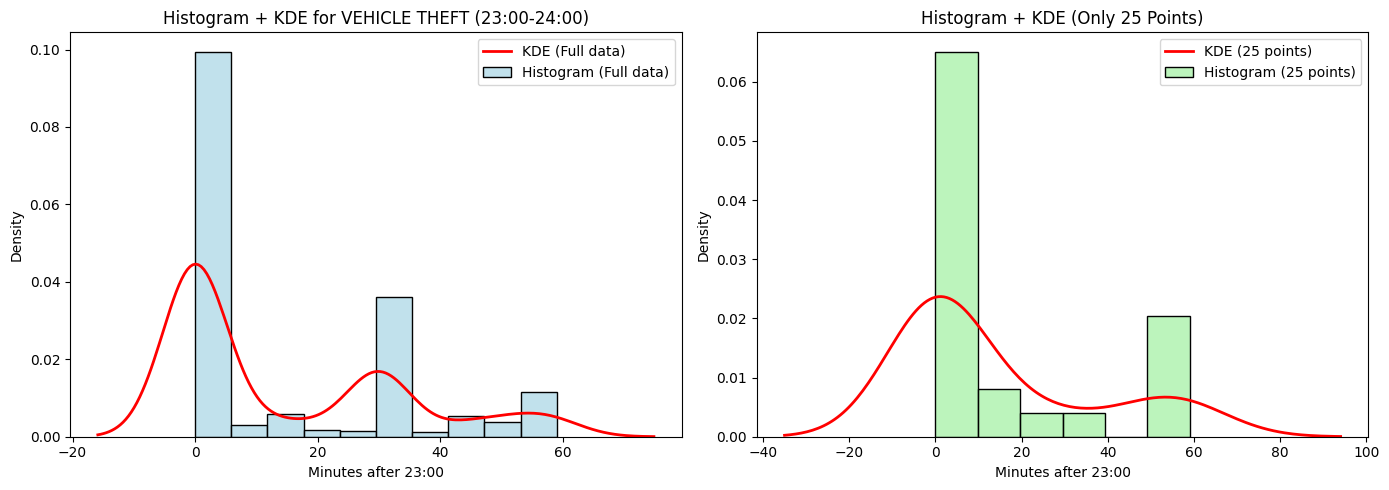

In [17]:
# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# Plot for the full dataset
sns.histplot(
    data=subset_df,
    x="MinutesAfter23",
    kde=False,
    bins=10,
    color="lightblue",
    edgecolor="black",
    stat="density",
    ax=axes[0],  # Use first subplot
    label="Histogram (Full data)"
)

sns.kdeplot(
    data=subset_df,
    x="MinutesAfter23",
    color="red",
    linewidth=2,
    fill=False,
    label="KDE (Full data)",
    ax=axes[0]
)

#using the first of the subplot slots
axes[0].set_title(f"Histogram + KDE for {crime_type} (23:00-24:00)")
axes[0].set_xlabel("Minutes after 23:00")
axes[0].set_ylabel("Density")
axes[0].legend()

# Sample 25 points
small_sample = subset_df.sample(n=25, random_state=42)

# Plot for 25-point sample
sns.histplot(
    data=small_sample,
    x="MinutesAfter23",
    bins=6,
    stat="density",
    color="lightgreen",
    edgecolor="black",
    alpha=0.6,
    label="Histogram (25 points)",
    ax=axes[1]  # Use second subplot
)

sns.kdeplot(
    data=small_sample,
    x="MinutesAfter23",
    color="red",
    linewidth=2,
    fill=False,
    label="KDE (25 points)",
    ax=axes[1]
)

#using the second the subplot slots
axes[1].set_title("Histogram + KDE (Only 25 Points)")
axes[1].set_xlabel("Minutes after 23:00")  # Fixed typo (was 13:00)
axes[1].set_ylabel("Density")
axes[1].legend()

plt.tight_layout()  # Adjust layout
plt.show()


**Analysis**

- **Large Spike at 0 Minutes:**  
  - The histogram shows a dominant bar at minute 0, with a secondary spike at approximately minute 30.


- **KDE’s Smooth Shape:**  
  - The red KDE curve creates a continuous distribution, introducing “bumps” where the data is densest.  
  - However, it may be misleading if the true data consists of discrete clumps (as seen with the binned times).


- **Why KDE Can Mislead:**  
  - With times binned at 0 and 30 minutes, the KDE oversmooths these discrete spikes, suggesting a broad peak.  
  - While useful for visualizing general trends, it may blur important details, such as the significant lumps at specific minutes.


- **25 points Misleading**
  - Taking 25 random points from the dataset, can be very misleading (see minute 30)

### Exercise Part 2: Probability and box plots

#### A) Figure 2.11 
Recall from Part 1.B that we created histograms of two crime types ("BURGLARY" vs. "VEHICLE THEFT") focusing on latitudes. In this section, we'll do probability plots for those same subsets.

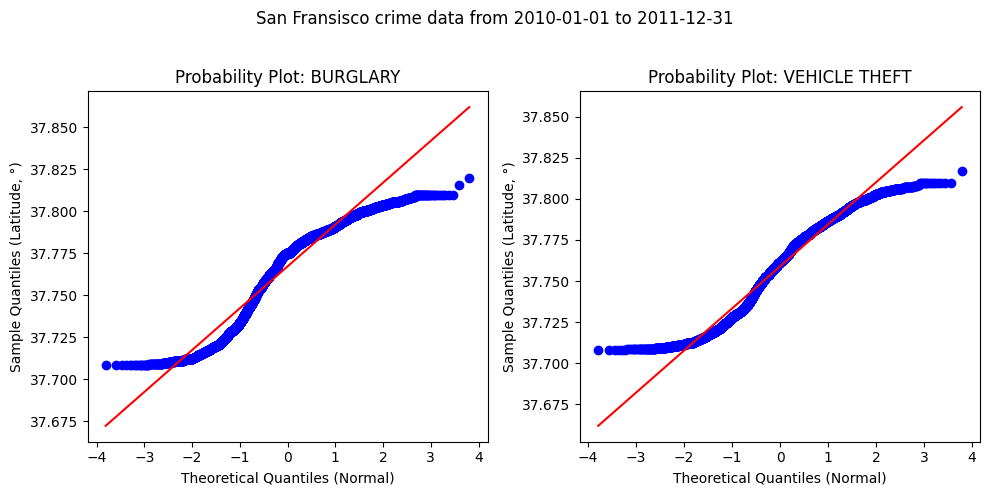

In [18]:
# Probability Plots

#creating the subplot grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=False)

#plotting the latitudes for crime1 
stats.probplot(df_c1["Y"].dropna(), dist="norm", plot=axes[0])
axes[0].set_title(f"Probability Plot: {crime1}")
axes[0].set_xlabel("Theoretical Quantiles (Normal)")
axes[0].set_ylabel("Sample Quantiles (Latitude, °)")

#plotting the latitudes for crime2
stats.probplot(df_c2["Y"].dropna(), dist="norm", plot=axes[1]) 
axes[1].set_title(f"Probability Plot: {crime2}")
axes[1].set_xlabel("Theoretical Quantiles (Normal)")
axes[1].set_ylabel("Sample Quantiles (Latitude, °)")

plt.suptitle(f"San Fransisco crime data from {start_date} to {end_date}\n")
plt.tight_layout()
plt.show()

#### B) Box-plot: Daily crime counts
In this section, we present the box-plot showcasing the daily occurance distributions for the 10 focus crimes with a box plot.

In [19]:
df_focus = df[df["Category"].isin(focuscrimes)].copy()
df_focus.dropna(subset=["Date"], inplace=True)

# Group by (crime, date)
daily_counts = (
    df_focus
    .groupby(["Category", "Date"])
    .size()
    .reset_index(name="count")
)

# Convert to a structure suitable for boxplot
crime_groups = daily_counts.groupby("Category")["count"].apply(list)

# Sort categories in alphabetical or by median
ordered_categories = sorted(crime_groups.index)

data_for_boxplot = [crime_groups[cat] for cat in ordered_categories]

/var/folders/8c/7zdp5y6j3fbbjxh65ghw770w0000gn/T/ipykernel_69249/3843732818.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot,


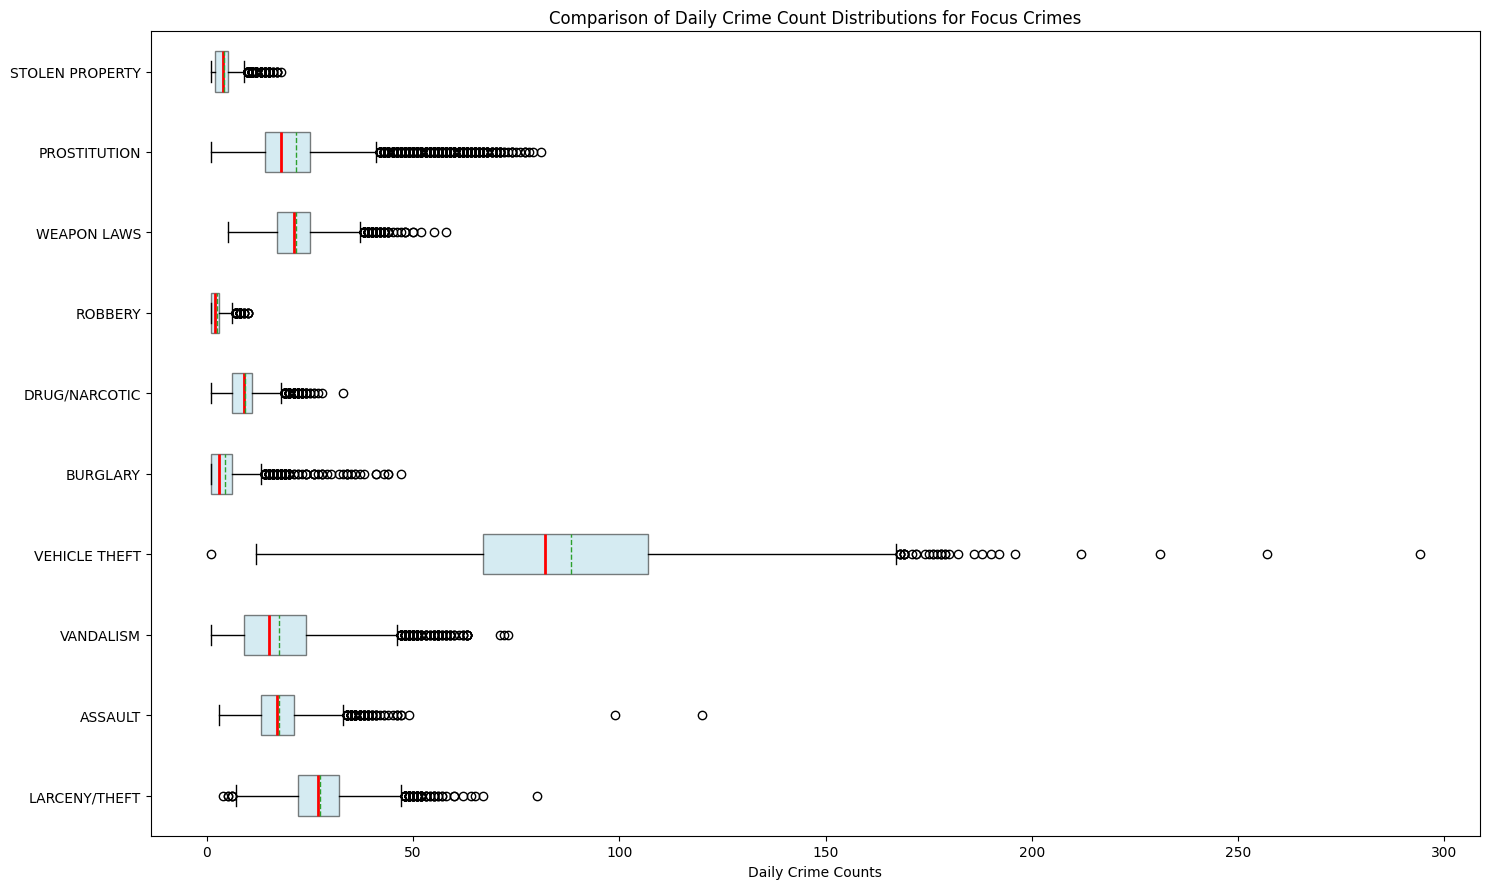

In [23]:
#To better be able to compare the different crime types, let's sort the graph my medians
medians = daily_counts.groupby("Category")["count"].median()
sorted_categories = medians.sort_values(ascending=False).index

# Create a single figure with multiple horizontal boxplots
plt.figure(figsize=(15, 9))
plt.boxplot(data_for_boxplot,
            vert=False,
            labels=sorted_categories,
            showfliers = True,
            showmeans=True,
            meanline=True,
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", alpha=0.5),
            medianprops=dict(color="red", linewidth=2),
        
           )
plt.xlabel('Daily Crime Counts')
plt.title('Comparison of Daily Crime Count Distributions for Focus Crimes')
plt.tight_layout()
plt.show()

/var/folders/8c/7zdp5y6j3fbbjxh65ghw770w0000gn/T/ipykernel_69249/2499938495.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sorted_data,


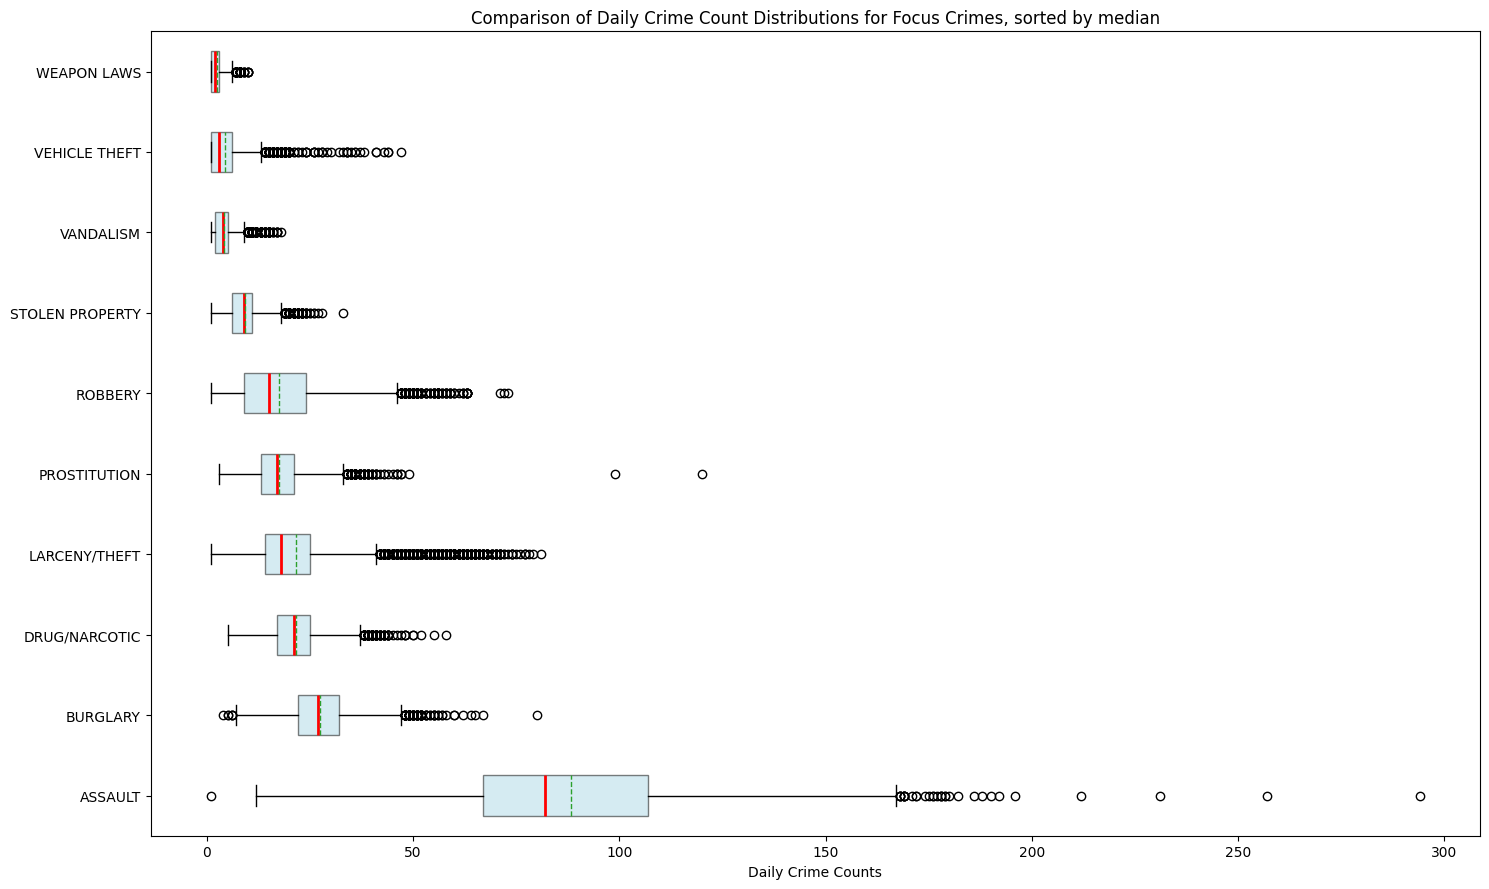

In [24]:


# Rebuild data_for_boxplot in sorted order
sorted_data = [crime_groups[cat] for cat in sorted_categories]

plt.figure(figsize=(15, 9))
plt.boxplot(sorted_data,
            vert=False,
            labels=ordered_categories,
            showfliers = True,
            showmeans=True,
            meanline=True,
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", alpha=0.5),
            medianprops=dict(color="red", linewidth=2),
        
           )
plt.xlabel('Daily Crime Counts')
plt.title('Comparison of Daily Crime Count Distributions for Focus Crimes, sorted by median')
plt.tight_layout()
plt.show()

**Analysis**

*Largest Overall Volume*
- *LARCENY/THEFT* dominates the daily counts, characterized by:
  - A high median.
  - Numerous extreme outliers (days with 200+ incidents).

*Moderate/High Categories*
- *ASSAULT*, *VANDALISM*, *VEHICLE THEFT*, *DRUG/NARCOTIC* and *BURGLARY* form a second tier:
  - They have lower median daily counts compared to LARCENY/THEFT.
  - They still show many outliers at higher counts

*Lower-Frequency Crimes*
- *ROBBERY*, *WEAPON LAWS*, *PROSTITUTION*, and *STOLEN PROPERTY*:
  - These crimes have smaller daily counts, with occasional spikes.

*Sorting helps!*
- Sorting by median makes it clear that *LARCENY/THEFT* outpaces other crimes.
- It also highlights that crimes like *PROSTITUTION* typically occur in much lower numbers per day.

#### C) Box-plot: Distribution of crime times

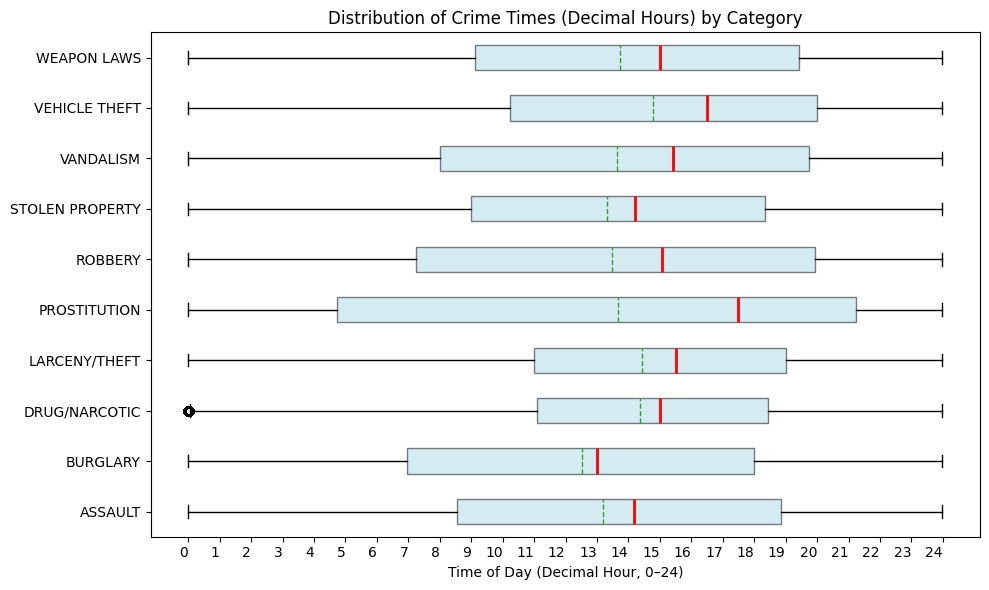

In [25]:
#Creating a function to transform the time column into decimal hours
def time_to_decimal_hour(t_str):
    """
    Convert 'HH:MM' or 'HH:MM:SS' -> decimal hours.
    e.g. '10:15' -> 10.25, '8:40' -> 8.67
    """
    parts = t_str.split(":")
    if len(parts) < 2:
        return np.nan
    hh = int(parts[0])
    mm = int(parts[1])
    ss = int(parts[2]) if len(parts) == 3 else 0
    return hh + mm/60 + ss/3600

#creating the column and assigning the values by calling the function
df_focus["DecimalHour"] = df_focus["Time"].apply(time_to_decimal_hour)
df_focus.dropna(subset=["DecimalHour"], inplace=True)

# Group times by crime category
grouped_times = df_focus.groupby("Category")["DecimalHour"].apply(list)

# Sort categories (alphabetical or by median time)
ordered_cats = sorted(grouped_times.index)

#saving the data in a form suited for the boxplot plotting
hour_data = [grouped_times[cat] for cat in ordered_cats]

plt.figure(figsize=(10, 6))
plt.boxplot(
    hour_data,
    vert = False, 
    tick_labels=ordered_cats,
    showfliers=True,
    showmeans=True,
    meanline=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', alpha=0.5),
    medianprops=dict(color='red', linewidth=2)
)
plt.title("Distribution of Crime Times (Decimal Hours) by Category")
plt.xlabel("Time of Day (Decimal Hour, 0–24)")
plt.xticks(list(range(0,25)),rotation=0, ha="right")
plt.tight_layout()
plt.show()


**Analysis**

*Late‐Night vs. Daytime Patterns*
- *PROSTITUTION*:
  - Tend to occur later in the evening
- *BURGLARY*:
  - Display broader spreads or tendencies towards midday occurrences.

*Varied Dispersion*
- *PROSTITUTION*:
  - The tall box plot with whiskers extending from near 0:00 to ~24:00 suggests incidents occur throughout the day.
- *DRUG/NARCOTIC*:
  - Clusters more within the 11:00–19:00 time window, indicating a narrower time span.

*Insights from Time-of-Day Analysis*
- Although a daily counts box plot cannot show when offenses occur during the day, the time-of-day box plot reveals each category’s characteristic temporal pattern.
- This information is valuable for scheduling patrols or analyzing shifts in criminal activity over a 24-hour period.

# Part 5

Temporal trends of prostitution over time

# Who did what?